In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 1000)

df=pd.read_csv('/data/pepper/final_data/arcs_calculated.csv', sep=',',header=0)


height has been deprecated.



In [20]:
df_data = df[(df.eNum == 2) & (df.Side == 'lr')]
max_data= df_data.groupby(['pNum']).max()
max_data

,Unnamed: 0,Side,arc,arc_left,arc_right,eNum,frameNum
pNum,,,,,,,
1,52,lr,NaN,154.809792,153.423716,2,245.0
3,118,lr,NaN,161.114545,160.299638,2,235.0
4,200,lr,NaN,190.760615,184.228858,2,426.0
5,143,lr,NaN,139.291695,135.171654,2,376.0
6,161,lr,NaN,195.881989,187.137130,2,381.0
7,123,lr,NaN,169.031618,166.627462,2,331.0
8,136,lr,NaN,162.198301,160.293973,2,345.0
9,152,lr,NaN,159.632144,163.586255,2,328.0
10,133,lr,NaN,167.992631,166.974376,2,312.0


In [23]:
from sklearn.cluster import KMeans
to_model = max_data[['arc_left','arc_right']]
model = KMeans(n_clusters = 3)
model.fit(to_model)
labels = model.predict(to_model)
print(len(labels))     

88


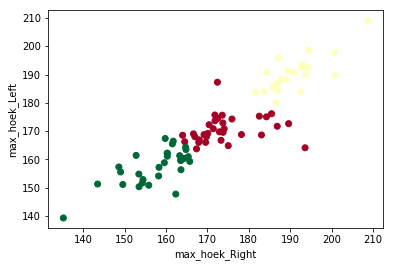

In [25]:
xs = to_model['arc_right']
ys = to_model['arc_left']
plt.xlabel("max_hoek_Right")
plt.ylabel("max_hoek_Left")
plt.scatter(xs, ys , alpha=1, c=labels, cmap=plt.cm.RdYlGn)
plt.show()

##Analyse:

groen: deze personen kunnen tussen 140 - 170 graden. Kan zeggen dat deze personen mischien wel klachten hebben,
       omdat niet boven de 170 kunnen bereiken.      
Rood: deze personen kunnen tussen 170 - 190 graden. Je kan zeggen dat deze personen mischien geen klachten hebben,
      maar ze kunnen niet de maximale graden bereiken. 
Geel: deze personen kunnen tussen 190 - 210 graden. Je kan zeggen dat deze personen mischien geen klachten hebben
    
    